In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz

# Load data from CSV
filename = "snow_data.csv"
data = pd.read_csv(filename, header=0, parse_dates=["Datetime"], index_col="Datetime")

et_tz = pytz.timezone("America/New_York")
if data.index.tz is None:
    data.index = data.index.tz_localize("UTC").tz_convert(et_tz)
else:
    data.index = data.index.tz_convert(et_tz)



In [ ]:
# Define opening range
opening_range_minutes = 30  # Default opening range (modifiable)
market_open_time = "09:30"
market_close_time = "16:00"
# Filter for market open period
opening_range = data.between_time(market_open_time, (pd.to_datetime(market_open_time) + pd.Timedelta(minutes=opening_range_minutes)).strftime("%H:%M"))

# Verify 'High' column exists
if "High" not in data.columns or "Low" not in data.columns:
    raise KeyError("CSV file does not contain 'High' or 'Low' columns. Check CSV headers.")

In [ ]:
# Calculate opening range high and low
openRangeHigh = opening_range["High"].max()
openRangeLow = opening_range["Low"].min()

# Define ACD levels
A_Level = 0.5  # Customizable multiplier
A_Up = openRangeHigh + A_Level
A_Down = openRangeLow - A_Level

C_Level = 0.25  # Customizable multiplier
C_Up = openRangeHigh + C_Level
C_Down = openRangeLow - C_Level

# Filter data after opening range
post_opening_data = data.between_time((pd.to_datetime(market_open_time) + pd.Timedelta(minutes=opening_range_minutes)).strftime("%H:%M"), market_close_time)

# Plot data
plt.figure(figsize=(12, 6))
plt.plot(post_opening_data.index, post_opening_data["Close"], label="Stock Price", color='black')

# Plot Opening Range High/Low
plt.axhline(y=openRangeHigh, color='blue', linestyle='--', label="Opening Range High")
plt.axhline(y=openRangeLow, color='blue', linestyle='--', label="Opening Range Low")

# Plot ACD Levels
plt.axhline(y=A_Up, color='red', linestyle='-', label="A-Up Level")
plt.axhline(y=A_Down, color='red', linestyle='-', label="A-Down Level")
plt.axhline(y=C_Up, color='green', linestyle='-.', label="C-Up Level")
plt.axhline(y=C_Down, color='green', linestyle='-.', label="C-Down Level")

plt.xlabel("Time")
plt.ylabel("Price")
plt.title(f"ACD Levels for {filename}")
plt.legend()
plt.xticks(rotation=45)
plt.show()



In [ ]:
# !pip install mplfinance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz
import mplfinance as mpf

# Load data from CSV
filename = "snow_data.csv"
data = pd.read_csv(filename, header=0, parse_dates=["Datetime"], index_col="Datetime")

# Convert to Eastern Time (ET) only if not already timezone-aware
et_tz = pytz.timezone("America/New_York")
if data.index.tz is None:
    data.index = data.index.tz_localize("UTC").tz_convert(et_tz)
else:
    data.index = data.index.tz_convert(et_tz)

# Define opening range
opening_range_minutes = 30  # Default opening range (modifiable)
market_open_time = "09:30"
market_close_time = "16:00"

# Group data by day and create separate plots
for date, day_data in data.groupby(data.index.date):
    day_data = day_data.between_time(market_open_time, market_close_time)
    
    # Calculate opening range for each day
    opening_range = day_data.between_time(market_open_time, (pd.to_datetime(market_open_time) + pd.Timedelta(minutes=opening_range_minutes)).strftime("%H:%M"))
    openRangeHigh = opening_range["High"].max()
    openRangeLow = opening_range["Low"].min()
    
    # Define ACD levels
    A_Level = 0.5  # Customizable multiplier
    A_Up = openRangeHigh + A_Level
    A_Down = openRangeLow - A_Level
    
    C_Level = 0.25  # Customizable multiplier
    C_Up = openRangeHigh + C_Level
    C_Down = openRangeLow - C_Level
    
    # Create a new figure for each day
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot Opening Range High/Low
    ax.axhline(y=openRangeHigh, color='blue', linestyle='--', label=f"Opening Range High {date}")
    ax.axhline(y=openRangeLow, color='blue', linestyle='--', label=f"Opening Range Low {date}")
    
    # Plot ACD Levels
    ax.axhline(y=A_Up, color='red', linestyle='-', label=f"A-Up Level {date}")
    ax.axhline(y=A_Down, color='red', linestyle='-', label=f"A-Down Level {date}")
    ax.axhline(y=C_Up, color='green', linestyle='-.', label=f"C-Up Level {date}")
    ax.axhline(y=C_Down, color='green', linestyle='-.', label=f"C-Down Level {date}")
    
    # Filter the last 1-hour price data for the day
    last_hour_data = day_data.last("1H")
    
    # Plot candlestick chart
    mpf.plot(last_hour_data, type='candle', ax=ax, style='charles', volume=False)
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Price")
    ax.set_title(f"ACD Levels and Stock Price for {date}")
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()



In [ ]:
import yfinance as yf
import pytz
import pandas as pd

# Define timezone
et_tz = pytz.timezone("America/New_York")

# Define stock symbol and interval
symbol = "IONQ"
interval = "1m"  # Supports "1m", "5m", "15m", "30m", "1h", "1d"

# Get historical data
data = yf.download(symbol, interval=interval, period="7d")

# Reset index to include Datetime as a column
data.reset_index(inplace=True)

# Ensure correct column ordering
columns_order = ["Datetime", "Close", "High", "Low", "Open", "Volume"]
data = data[columns_order]  # Reorder the columns properly

# Save to CSV without extra index
csv_filename = f"{symbol.lower()}.csv"
data.to_csv(csv_filename, index=False)

print(f"Cleaned data saved to {csv_filename}")
print(data.head(10))  # Show first 10 rows for verification

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


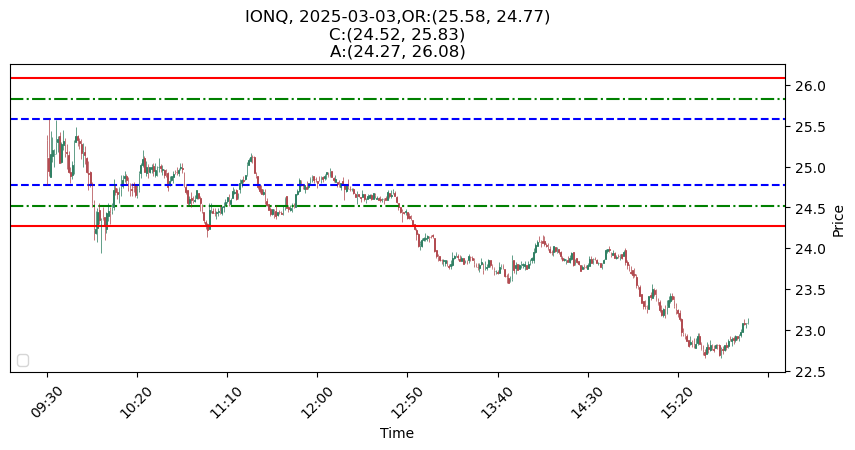

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


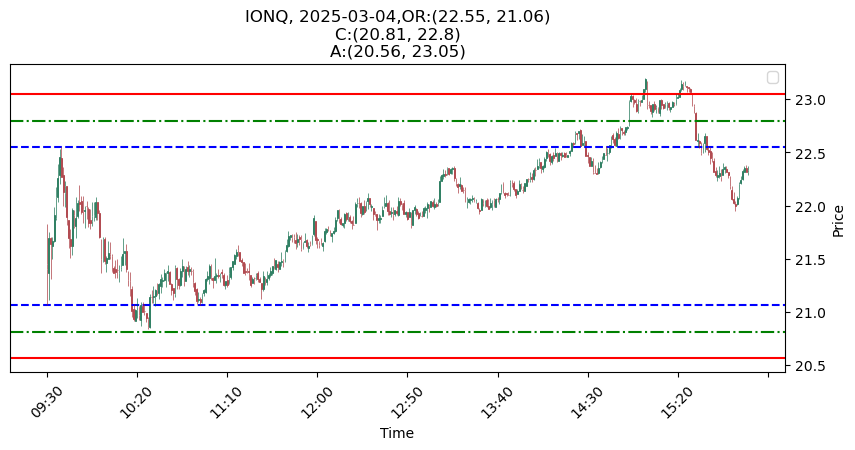

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


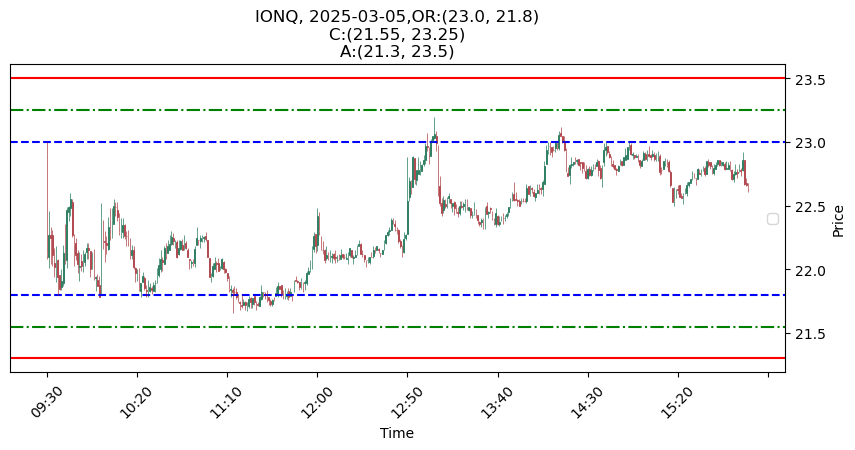

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


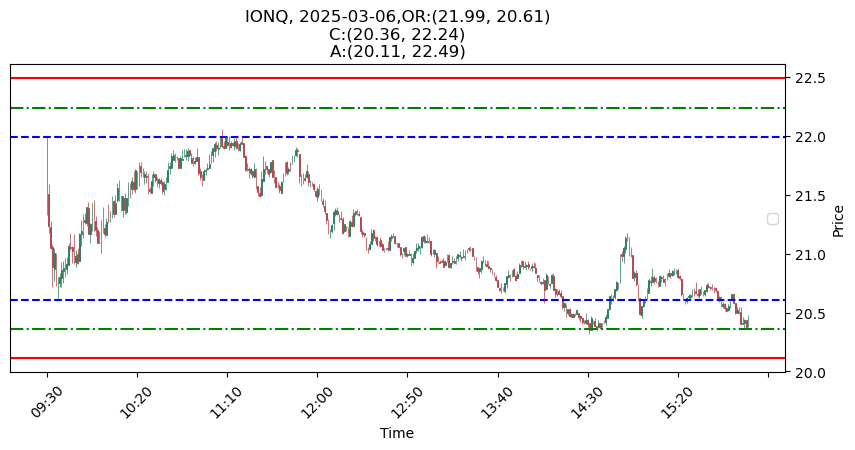

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


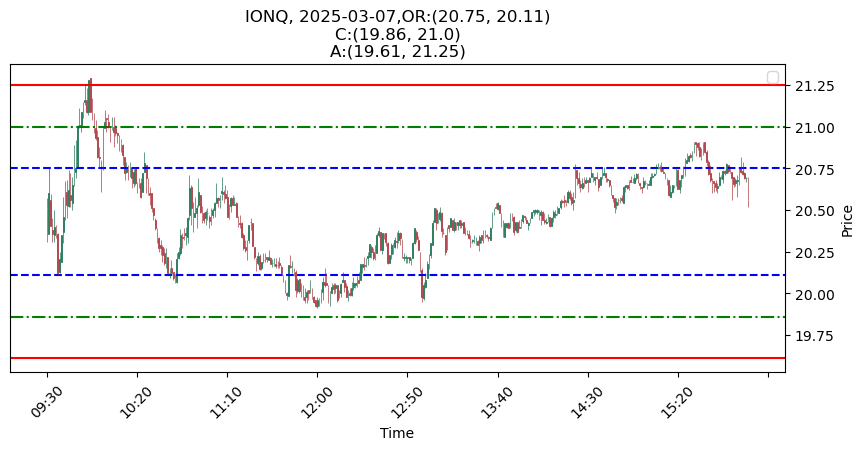

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


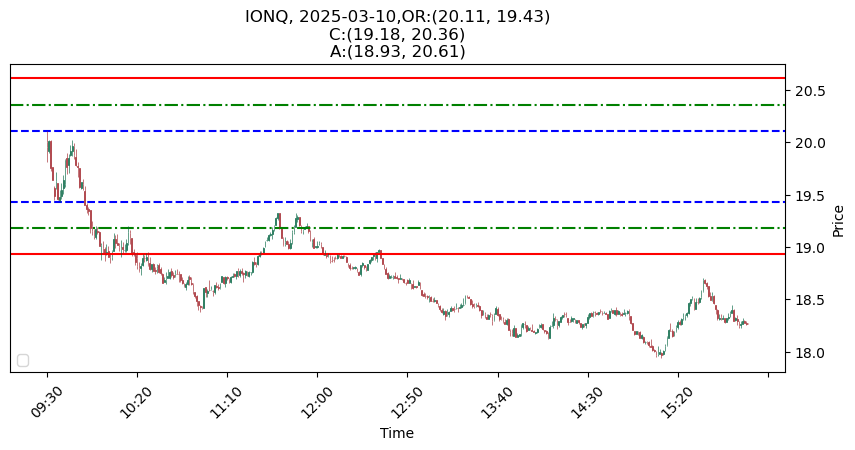

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


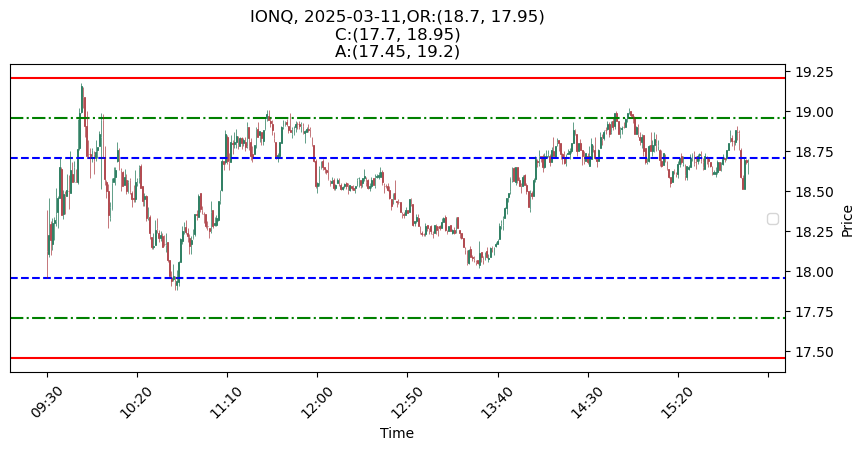

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz
import mplfinance as mpf
symbol='IONQ'
# Load data from CSV
filename = f"{symbol.lower()}.csv"
data = pd.read_csv(filename, header=0, parse_dates=["Datetime"], index_col="Datetime",skiprows=[1])

# Convert to Eastern Time (ET) only if not already timezone-aware
et_tz = pytz.timezone("America/New_York")
if data.index.tz is None:
    data.index = data.index.tz_localize("UTC").tz_convert(et_tz)
else:
    data.index = data.index.tz_convert(et_tz)

# Define opening range
opening_range_minutes = 12  # Default opening range (modifiable)
market_open_time = "09:30"
market_close_time = "16:00"

# Group data by day and create separate plots
for date, day_data in data.groupby(data.index.date):
    day_data = day_data.between_time(market_open_time, market_close_time)
    
    # Calculate opening range for each day
    opening_range = day_data.between_time(market_open_time, (pd.to_datetime(market_open_time, format="%H:%M") + pd.Timedelta(minutes=opening_range_minutes)).strftime("%H:%M"))
    openRangeHigh = opening_range["High"].max()
    openRangeLow = opening_range["Low"].min()
    
    # Define ACD levels
    A_Level = 0.5  # Customizable multiplier
    A_Up = openRangeHigh + A_Level
    A_Down = openRangeLow - A_Level
    
    C_Level = 0.25  # Customizable multiplier
    C_Up = openRangeHigh + C_Level
    C_Down = openRangeLow - C_Level
    
    # Create a new figure for each day
    fig, ax = plt.subplots(figsize=(10, 4))
    
   
    # Plot Opening Range High/Low
    ax.axhline(y=openRangeHigh, color='blue', linestyle='--')
    ax.axhline(y=openRangeLow, color='blue', linestyle='--')
    
    # Plot ACD Levels
    ax.axhline(y=A_Up, color='red', linestyle='-')
    ax.axhline(y=A_Down, color='red', linestyle='-')
    ax.axhline(y=C_Up, color='green', linestyle='-.')
    ax.axhline(y=C_Down, color='green', linestyle='-.')
    
    
    # Filter the full day's price data instead of last 1 hour
    full_day_data = day_data
    
    # Plot candlestick chart
    mpf.plot(full_day_data, type='candle', ax=ax, style='charles', volume=False)
    
    ax.set_xlabel("Time")
    ax.set_ylabel(f"Price")
    ax.set_title(f"{symbol}, {date},OR:{round(openRangeHigh,2),round(openRangeLow,2)}\nC:{round(C_Down,2),round(C_Up,2)}\nA:{round(A_Down,2),round(A_Up,2)}")
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Group data by day and create separate plots
for date, day_data in data.groupby(data.index.date):
    day_data = day_data.between_time(market_open_time, market_close_time)
    
    # Calculate opening range for each day
    opening_range = day_data.between_time(market_open_time, (pd.to_datetime(market_open_time, format="%H:%M") + pd.Timedelta(minutes=opening_range_minutes)).strftime("%H:%M"))
    openRangeHigh = opening_range["High"].max()
    openRangeLow = opening_range["Low"].min()
    
    # Calculate ATR and A_Level dynamically
    atr_value = calculate_atr(opening_range).iloc[-1]
    # Define ACD levels
    A_Level = 1.1 * atr_value  # Adjust multiplier as needed
    A_Up = openRangeHigh + A_Level
    A_Down = openRangeLow - A_Level
    
    C_Level = 1.25 * atr_value  # Customizable multiplier
    C_Up = openRangeHigh + C_Level
    C_Down = openRangeLow - C_Level
    
    # Create a new figure for each day
    fig, ax = plt.subplots(figsize=(10, 4))
    
   
    # Plot Opening Range High/Low
    ax.axhline(y=openRangeHigh, color='blue', linestyle='--')
    ax.axhline(y=openRangeLow, color='blue', linestyle='--')
    
    # Plot ACD Levels
    ax.axhline(y=A_Up, color='red', linestyle='-')
    ax.axhline(y=A_Down, color='red', linestyle='-')
    ax.axhline(y=C_Up, color='green', linestyle='-.')
    ax.axhline(y=C_Down, color='green', linestyle='-.')
    
    
    # Filter the full day's price data instead of last 1 hour
    full_day_data = day_data
    
    # Plot candlestick chart
    mpf.plot(full_day_data, type='candle', ax=ax, style='charles', volume=False)
    
    ax.set_xlabel("Time")
    ax.set_ylabel(f"Price")
    ax.set_title(f"{symbol}, {date},OR:{round(openRangeHigh,2),round(openRangeLow,2)}\nC:{round(C_Down,2),round(C_Up,2)}\nA:{round(A_Down,2),round(A_Up,2)}")
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz
import mplfinance as mpf

# Load data from CSV
filename = "snow_data.csv"
data = pd.read_csv(filename, header=0, parse_dates=["Datetime"], index_col="Datetime")

# Convert to Eastern Time (ET) only if not already timezone-aware
et_tz = pytz.timezone("America/New_York")
if data.index.tz is None:
    data.index = data.index.tz_localize("UTC").tz_convert(et_tz)
else:
    data.index = data.index.tz_convert(et_tz)

# Define opening range
opening_range_minutes = 30  # Default opening range (modifiable)
market_open_time = "09:30"
market_close_time = "16:00"

# Group data by day and create separate plots
for date, day_data in data.groupby(data.index.date):
    day_data = day_data.between_time(market_open_time, market_close_time)
    
    # Calculate opening range for each day
    opening_range = day_data.between_time(market_open_time, (pd.to_datetime(market_open_time, format="%H:%M") + pd.Timedelta(minutes=opening_range_minutes)).strftime("%H:%M"))
    openRangeHigh = opening_range["High"].max()
    openRangeLow = opening_range["Low"].min()
    
    # Define ACD levels
    A_Level = 0.5  # Customizable multiplier
    A_Up = openRangeHigh + A_Level
    A_Down = openRangeLow - A_Level
    
    C_Level = 0.25  # Customizable multiplier
    C_Up = openRangeHigh + C_Level
    C_Down = openRangeLow - C_Level
    
    # Create a new figure for each day
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Highlight opening range period
    ax.axvspan(pd.to_datetime(market_open_time, format="%H:%M"),
               pd.to_datetime(market_open_time, format="%H:%M") + pd.Timedelta(minutes=opening_range_minutes),
               color='gray', alpha=0.3, label="Opening Range")
    
    # Plot Opening Range High/Low
    ax.axhline(y=openRangeHigh, color='blue', linestyle='--')
    ax.axhline(y=openRangeLow, color='blue', linestyle='--')
    
    # Plot ACD Levels
    ax.axhline(y=A_Up, color='red', linestyle='-')
    ax.axhline(y=A_Down, color='red', linestyle='-')
    ax.axhline(y=C_Up, color='green', linestyle='-.')
    ax.axhline(y=C_Down, color='green', linestyle='-.')
    
    # Filter the full day's price data instead of last 1 hour
    full_day_data = day_data
    
    # Plot candlestick chart
    mpf.plot(full_day_data, type='candle', ax=ax, style='charles', volume=False)
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Price")
    ax.set_title(f"ACD Levels and Stock Price for {date}")
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()
